# Wagtail topology weighting framework

To start analysis load packages, styles and initialize (run) functions

In [ ]:
To do:
    Limit gene flow
    Think about hybridization model
    

## Loading packages

In [2]:
import msprime
import numpy as np
import scipy
from IPython.display import SVG
import tskit
#import allel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import ternary #
import collections
import random
import demesdraw 

import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=16)

In [3]:
def set_demography(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="P1", initial_size=Ne)
    demography.add_population(name="P2", initial_size=Ne)
    demography.add_population(name="P3", initial_size=Ne)
    demography.add_population(name="O", initial_size=Ne)
    demography.add_population(name="P12", initial_size=Ne)
    demography.add_population(name="P123", initial_size=Ne)
    demography.add_population(name="ANC", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["P1", "P2"], ancestral="P12")
    demography.add_population_split(time=t2, derived=["P12", "P3"], ancestral="P123")
    demography.add_population_split(time=t3, derived=["P123", "O"], ancestral="ANC")
    
    #setting up gene flow
    demography.set_migration_rate("P3", "P2", mig_rate)
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()

    return demography

def set_demography_s(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="P1", initial_size=Ne)
    demography.add_population(name="P2", initial_size=Ne)
    demography.add_population(name="P3", initial_size=Ne)
    demography.add_population(name="O", initial_size=Ne)
    demography.add_population(name="P12", initial_size=Ne)
    demography.add_population(name="P123", initial_size=Ne)
    demography.add_population(name="ANC", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["P1", "P2"], ancestral="P12")
    demography.add_population_split(time=t2, derived=["P12", "P3"], ancestral="P123")
    demography.add_population_split(time=t3, derived=["P123", "O"], ancestral="ANC")
    
    #setting up gene flow
    demography.set_migration_rate("P3", "P2", mig_rate)

    return demography

'''
def tern_plot(data):
    # Set up the figure.
    fig, tax = ternary.figure(scale=100)
    fig.set_size_inches(10, 9)

    # Plot points.
    tax.scatter(data,color="green",alpha=0.3)

    # Axis labels. (See below for corner labels.)
    fontsize = 14
    offset = 0.08
    tax.left_axis_label("T control %", fontsize=fontsize, offset=offset)
    tax.right_axis_label("T species %", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("T reproduction %", fontsize=fontsize, offset=-offset)
    tax.set_title("Ternary Framework", fontsize=20)

    # Decoration.
    tax.boundary(linewidth=0.1)
    tax.gridlines(multiple=10, color="grey")
    tax.ticks(axis='lbr', linewidth=0.2, multiple=20)
    tax.get_axes().axis('off')
'''
            
        
def produce_ranks(ts_reps):
    ranks=[]
    for replicate_index, ts in enumerate(ts_reps):
        for t in ts.trees():
            ranks+=[t.rank()]
    return ranks
        
def summarize_ranks(num_replicates,ranks):    
    topo_weight= []
    topS_count = []
    topC_count = []
    topR_count = []

    rank_dict=collections.Counter(ranks)

    for key, value in rank_dict.items():
        if key == (4,0) or key == (3,11) or key == (3,8) or key == (3,0) or key == (3,3):
            topS_count.append(value)
            #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
            # TOPOLOGY C
        elif key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
            topR_count.append(value)
            # TOPOLOGY R
    count_array=[(sum(topR_count)/num_replicates)*100, sum(topS_count)/num_replicates*100, sum(topC_count)/num_replicates*100]
    return count_array

def make_data(num_data_points,num_replicates,t1,t2,t3,Ne,mig_rate):
    topo_sum=[]
    for i in range(num_data_points):
        ranks=produce_ranks(simulate_windows(num_replicates,set_demography_s(t1,t2,t3,mig_rate,Ne)))
        topo_sum.append(summarize_ranks(num_replicates,ranks))
    return topo_sum

## Simulation set up

### Model #1

In [30]:
def simulate_windows(num_replicates,demography):
    ancestry_reps = msprime.sim_ancestry(samples={"gra": 1, "alb": 1, "sam": 1, "agu": 1}, 
                                         demography=demography, sequence_length=10000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        yield mutated_ts


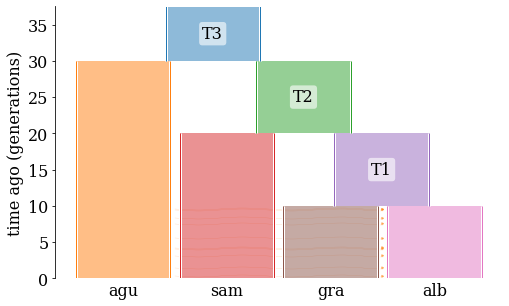

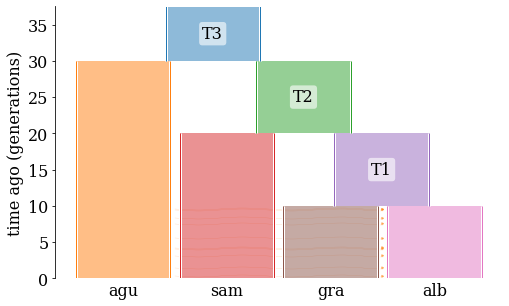

Demography(populations=[Population(initial_size=100, growth_rate=0, name='gra', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='alb', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='sam', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='agu', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=100, growth_rate=0, name='T1', description='', extra_metadata={}, default_sampling_time=10, initially_active=False, id=4), Population(initial_size=100, growth_rate=0, name='T2', description='', extra_metadata={}, default_sampling_time=20, initially_active=False, id=5), Population(initial_size=100, growth_rate=0, name='T3', description='', extra_metadata={}, default_sampling_time=30, initially_active=False, id=6)], events=[PopulationSplit(time=10, derived=['gra', 'alb'], ancestral='T1'), PopulationSplit(time=20, derived=['T1', 'sam'], ancestral='T2'), PopulationSplit(time=30, derived=['T2', 'agu'], ancestral='T3')], migration_matrix=array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ]]))

In [7]:
def demogr_model1(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="gra", initial_size=Ne)
    demography.add_population(name="alb", initial_size=Ne)
    demography.add_population(name="sam", initial_size=Ne)
    demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=Ne)
    demography.add_population(name="T2", initial_size=Ne)
    demography.add_population(name="T3", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["gra","alb"], ancestral="T1")
    demography.add_population_split(time=t2, derived=["T1","sam"], ancestral="T2")
    demography.add_population_split(time=t3, derived=["T2","agu"], ancestral="T3")
    
    #setting up gene flow
    demography.set_migration_rate("alb", "agu", mig_rate)
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()

    return demography

demogr_model1(10,20,30,0.1,100)

def demogr_model1_s(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="gra", initial_size=Ne)
    demography.add_population(name="alb", initial_size=Ne)
    demography.add_population(name="sam", initial_size=Ne)
    demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=Ne)
    demography.add_population(name="T2", initial_size=Ne)
    demography.add_population(name="T3", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["gra","alb"], ancestral="T1")
    demography.add_population_split(time=t2, derived=["T1","sam"], ancestral="T2")
    demography.add_population_split(time=t3, derived=["T2","agu"], ancestral="T3")
    
    #setting up gene flow
    demography.set_migration_rate("alb", "agu", mig_rate)
    
    '''
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()
    '''
    return demography

demogr_model1(10,20,30,0.1,100)

#Fix parameters from 

### Model #2

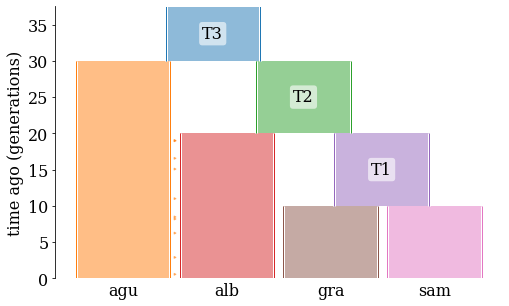

Demography(populations=[Population(initial_size=100, growth_rate=0, name='gra', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='sam', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='alb', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='agu', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=100, growth_rate=0, name='T1', description='', extra_metadata={}, default_sampling_time=10, initially_active=False, id=4), Population(initial_size=100, growth_rate=0, name='T2', description='', extra_metadata={}, default_sampling_time=20, initially_active=False, id=5), Population(initial_size=100, growth_rate=0, name='T3', description='', extra_metadata={}, default_sampling_time=30, initially_active=False, id=6)], events=[PopulationSplit(time=10, derived=['gra', 'sam'], ancestral='T1'), PopulationSplit(time=20, derived=['T1', 'alb'], ancestral='T2'), PopulationSplit(time=30, derived=['T2', 'agu'], ancestral='T3')], migration_matrix=array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ]]))

In [8]:
def demogr_model2(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="gra", initial_size=Ne)
    demography.add_population(name="sam", initial_size=Ne)
    demography.add_population(name="alb", initial_size=Ne)
    demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=Ne)
    demography.add_population(name="T2", initial_size=Ne)
    demography.add_population(name="T3", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["gra","sam"], ancestral="T1")
    demography.add_population_split(time=t2, derived=["T1","alb"], ancestral="T2")
    demography.add_population_split(time=t3, derived=["T2","agu"], ancestral="T3")
    
    #setting up gene flow
    demography.set_migration_rate("alb", "agu", mig_rate)
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()

    return demography

demogr_model2(10,20,30,0.1,100)

### Model #3

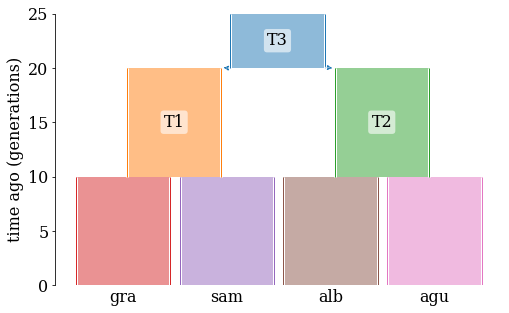

Demography(populations=[Population(initial_size=100, growth_rate=0, name='gra', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='sam', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='alb', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='agu', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=100, growth_rate=0, name='T1', description='', extra_metadata={}, default_sampling_time=10, initially_active=False, id=4), Population(initial_size=100, growth_rate=0, name='T2', description='', extra_metadata={}, default_sampling_time=10, initially_active=False, id=5), Population(initial_size=100, growth_rate=0, name='T3', description='', extra_metadata={}, default_sampling_time=20, initially_active=False, id=6)], events=[PopulationSplit(time=10, derived=['gra', 'sam'], ancestral='T1'), PopulationSplit(time=10, derived=['agu', 'alb'], ancestral='T2'), PopulationSplit(time=20, derived=['T2', 'T1'], ancestral='T3')], migration_matrix=array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]]))

In [9]:
def demogr_model3(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="gra", initial_size=Ne)
    demography.add_population(name="sam", initial_size=Ne)
    demography.add_population(name="alb", initial_size=Ne)
    demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=Ne)
    demography.add_population(name="T2", initial_size=Ne)
    demography.add_population(name="T3", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["gra","sam"], ancestral="T1")
    demography.add_population_split(time=t1, derived=["agu","alb"], ancestral="T2")
    demography.add_population_split(time=t3, derived=["T2","T1"], ancestral="T3")
    
    #setting up gene flow
    demography.set_migration_rate("gra", "alb", mig_rate)
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()

    return demography

demogr_model3(10,10,20,0,100)

### Model #4

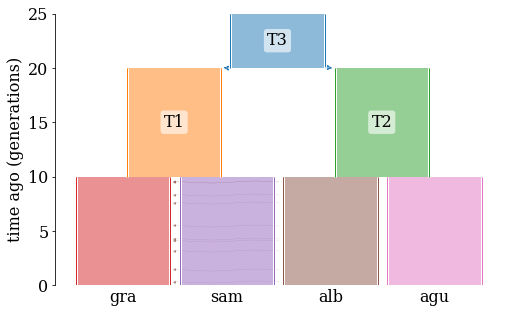

Demography(populations=[Population(initial_size=100, growth_rate=0, name='gra', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=100, growth_rate=0, name='sam', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=100, growth_rate=0, name='alb', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=100, growth_rate=0, name='agu', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=100, growth_rate=0, name='T1', description='', extra_metadata={}, default_sampling_time=10, initially_active=False, id=4), Population(initial_size=100, growth_rate=0, name='T2', description='', extra_metadata={}, default_sampling_time=10, initially_active=False, id=5), Population(initial_size=100, growth_rate=0, name='T3', description='', extra_metadata={}, default_sampling_time=20, initially_active=False, id=6)], events=[PopulationSplit(time=10, derived=['gra', 'sam'], ancestral='T1'), PopulationSplit(time=10, derived=['agu', 'alb'], ancestral='T2'), PopulationSplit(time=20, derived=['T2', 'T1'], ancestral='T3')], migration_matrix=array([[0. , 0. , 0.7, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ]]))

In [10]:
def demogr_model4(t1,t2,t3,mig_rate,Ne):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="gra", initial_size=Ne)
    demography.add_population(name="sam", initial_size=Ne)
    demography.add_population(name="alb", initial_size=Ne)
    demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=Ne)
    demography.add_population(name="T2", initial_size=Ne)
    demography.add_population(name="T3", initial_size=Ne)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["gra","sam"], ancestral="T1")
    demography.add_population_split(time=t1, derived=["agu","alb"], ancestral="T2")
    demography.add_population_split(time=t3, derived=["T2","T1"], ancestral="T3")
    
    #setting up gene flow
    demography.set_migration_rate("gra", "alb", mig_rate)
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()

    return demography

demogr_model4(10,10,20,0.7,100)

### Setting up simulations

`simulate_windows(num_replicates,demography)`

Simulates one window with length 50000 (50kb).  
Simulation consists of two steps. First creates ancestry of the sample. One haploid individual is sampled from each of the populations (((P1,P2),P3),O). The second step adds mutations with the rate **1/10000**

> Note: We assume no recombination within the window, recombination is not included in the simulation

Parameters to specify are:
- `num_replicates`
- `demography` can be specified using functions above

In [5]:
def simulate_windows(num_replicates,demography):
    ancestry_reps = msprime.sim_ancestry(samples={"agu": 1, "alb": 1, "gra": 1, "sam": 1}, 
                                         demography=demography, sequence_length=50000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/100000))
        yield mutated_ts

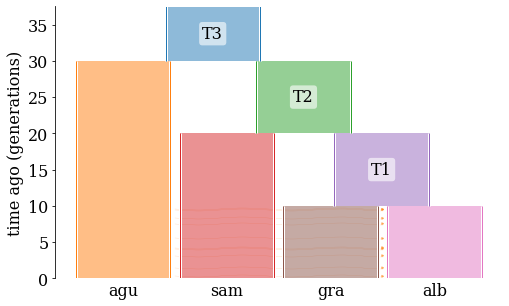

Number of mutations on the tree 186


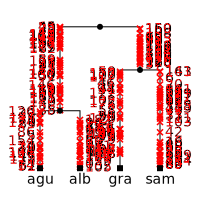

Number of mutations on the tree 301


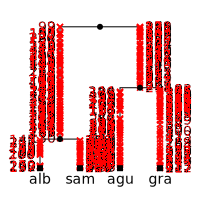

Number of mutations on the tree 159


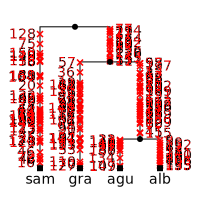

In [11]:
num_replicates = 3
windows=simulate_windows(num_replicates,demogr_model1(10,20,30,0.7,100))
for replicate_index, ts in enumerate(windows):
    for t in ts.trees():
        print("Number of mutations on the tree "+str(t.num_mutations))
        display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 200))))

### Summarizing tree sequences, topology weighting plot

Simulations above will output replicates of tree sequences (all in one iterable object). In this section we develop the way to efficiently output the result of simulation and calculate values for ternary plots.

Simple simulation outputs the tree sequence object:

For the ternary plot we only need information about tree topologies, which are compactly stored in "rank" parameter. See tskit manual for the details: https://tskit.dev/tskit/docs/latest/topological-analysis.html

Below we visualize ranks corresponding to names on Figure 4 of the manuscript:

Topology 1 = rank (3,8)


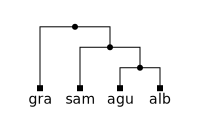

Topology 2 = rank (3,11)


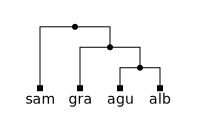

Topology 3 = rank (4,0)


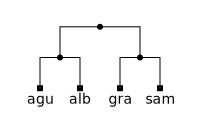

Topology 7 = rank (3,9)


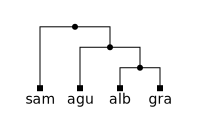

Topology 10 = rank (3,3)


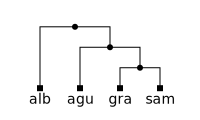

Topology 14 = rank (3,10)


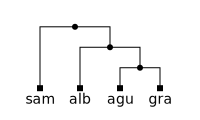

Topology 15 = rank (3,0)


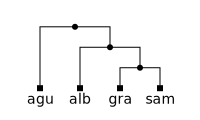

Topology ? = rank (3,1)


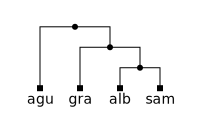

Topology ? = rank (3,2)


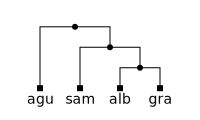

Topology ? = rank (3,4)


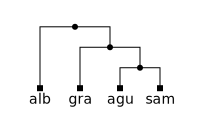

Topology ? = rank (3,5)


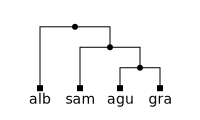

Topology ? = rank (3,6)


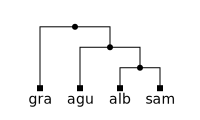

Topology ? = rank (3,7)


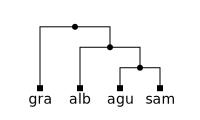

Topology ? = rank (4,1)


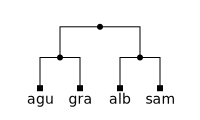

Topology ? = rank (4,2)


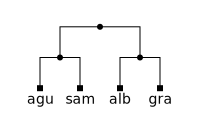

In [12]:
print("Topology 1 = rank (3,8)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,8))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology 2 = rank (3,11)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,11))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology 3 = rank (4,0)")
t = tskit.Tree.unrank(num_leaves=4, rank=(4,0))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology 7 = rank (3,9)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,9))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology 10 = rank (3,3)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,3))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology 14 = rank (3,10)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,10))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology 15 = rank (3,0)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,0))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (3,1)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,1))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (3,2)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,2))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (3,4)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,4))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (3,5)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,5))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (3,6)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,6))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (3,7)")
t = tskit.Tree.unrank(num_leaves=4, rank=(3,7))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (4,1)")
t = tskit.Tree.unrank(num_leaves=4, rank=(4,1))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

print("Topology ? = rank (4,2)")
t = tskit.Tree.unrank(num_leaves=4, rank=(4,2))
display(SVG(t.draw_svg(node_labels={0: "agu", 1: "alb", 2: "gra", 3 : "sam"}, order="tree", size=(200, 120))))

Next we gather rank information from all the iterations: 

`produce_ranks` outputs ranks from all simulated windows

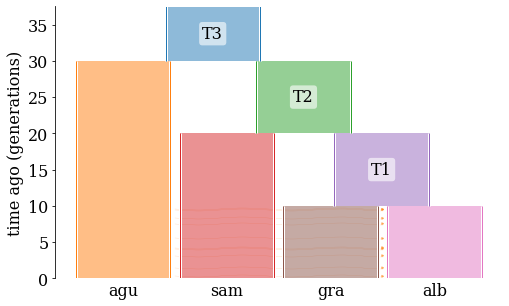

[(3, 0),
 (3, 11),
 (4, 2),
 (3, 10),
 (4, 2),
 (4, 2),
 (4, 0),
 (3, 3),
 (3, 7),
 (4, 1)]

In [75]:
windows=simulate_windows(10,demogr_model1(10,20,30,0.7,100))
produce_ranks(windows)

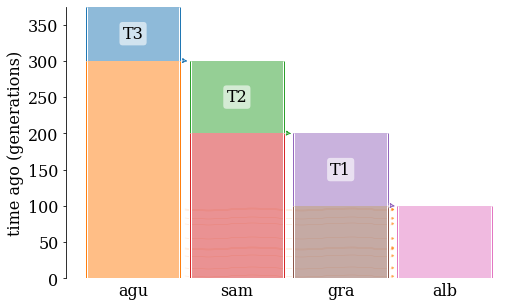

/Users/dshipilina/anaconda3/envs/dasha/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


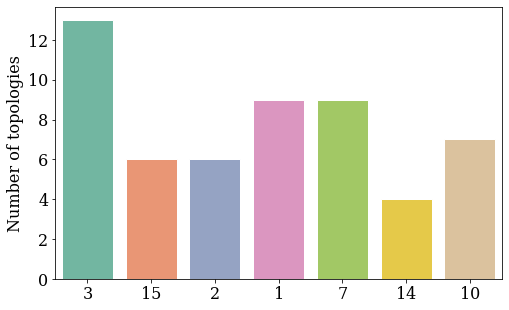

[13, 6, 6, 9, 9, 4, 7]


In [13]:
def summarize_topolog(num_replicates,ranks):    
    topo_weight= 0
    top1_count = 0
    top2_count = 0
    top3_count = 0
    top7_count = 0
    top10_count = 0
    top14_count = 0
    top15_count = 0

    rank_dict=collections.Counter(ranks)

    for key, value in rank_dict.items():
        if key == (3,8):
            top1_count+=value
        elif key == (3,11):
            top2_count+=value
        elif key == (4,0):
            top3_count+=value
        elif key == (3,9):
            top7_count+=value
        elif key == (3,3):
            top10_count+=value
        elif key == (3,10):
            top14_count+=value
        elif key == (3,0):
            top15_count+=value
            
    #print([top3_count,top15_count,top2_count,top1_count,top7_count,top14_count,top10_count])
    return [top3_count,top15_count,top2_count,top1_count,top7_count,top14_count,top10_count]
    #return [(top3_count/num_replicates)*100, top15_count/num_replicates*100, top2_count/num_replicates*100]
    #return count_array
    
num_replicates=100
windows=simulate_windows(num_replicates,demogr_model1(100,200,300,0.1,10000))
ranks=produce_ranks(windows)
bars=summarize_topolog(num_replicates,ranks)

g=sns.barplot(np.arange(7), bars, palette = 'Set2', edgecolor = 'w')
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
#plt.xticks(rotation=90)
#plt.xlabel("Position along the chromosome")
plt.ylabel("Number of topologies")#color="#f5f5f5")
g.set_xticklabels(["3","15","2","1","7","14","10"])
#plt.plot(summarize_topolog(ranks)) #, color='g')
plt.show()

print(bars)